<a href="https://colab.research.google.com/github/sarenales/OFA-VSR/blob/main/Caption_infer_vsr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA SET

In [1]:
!git clone https://github.com/cambridgeltl/visual-spatial-reasoning.git

Cloning into 'visual-spatial-reasoning'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 253 (delta 37), reused 17 (delta 17), pack-reused 204
Receiving objects: 100% (253/253), 10.98 MiB | 6.57 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [2]:
import json
archivo_jsonl = "/content/visual-spatial-reasoning/data/data_files/all_vsr_validated_data.jsonl"
train = []
with open(archivo_jsonl, "r") as f:
  for linea in f:
    objeto = json.loads(linea)
    train.append(objeto)

In [3]:
train

[{'image': '000000239417.jpg',
  'image_link': 'http://images.cocodataset.org/train2017/000000239417.jpg',
  'caption': 'The bench is at the right side of the train.',
  'label': 0,
  'relation': 'at the right side of',
  'annotator_id': 1,
  'vote_true_validator_id': '[]',
  'vote_false_validator_id': '[2, 10, 1]',
  'reference_frame': None},
 {'image': '000000224670.jpg',
  'image_link': 'http://images.cocodataset.org/train2017/000000224670.jpg',
  'caption': 'The train contains the laptop.',
  'label': 1,
  'relation': 'contains',
  'annotator_id': 30,
  'vote_true_validator_id': '[2, 67, 21]',
  'vote_false_validator_id': '[]',
  'reference_frame': None},
 {'image': '000000266622.jpg',
  'image_link': 'http://images.cocodataset.org/train2017/000000266622.jpg',
  'caption': 'The bowl is at the left side of the banana.',
  'label': 1,
  'relation': 'at the left side of',
  'annotator_id': 2,
  'vote_true_validator_id': '[13, 2, 1]',
  'vote_false_validator_id': '[]',
  'reference_fra

In [4]:
diccionario_opuesto ={
    # Adjacency (10)
    "Adjacent to":"alongside",
    "alongside": "Adjacent to",
    "at the side of":"against",
    "at the right side of":"at the left side of",
    "at the left side of": "at the right side of",
    "attached to":"against",
    "at the back of":"ahead of",
    "ahead of":"at the back of",
    "against": "ahead of",
    "at the edge of":"Adjacent to",

  # Directional (16)
    "off":"up",
    "past":"across from",
    "toward":"down",
    "down":"up",
    "deep down":"up",
    "up":"deep down",
    "away from":"across from",
    "along":"Adjacent to",
    "around":"off",
    "from":"away from",
    "into":"off",
    "to":"in front of",
    "across":"off"  ,
    "across from":"Adjacent to" ,
    "through":"Adjacent to",
    "down from":"into"    ,

  # Orientation (4)
    "facing":"facing away from"  ,
    "facing away from":"facing"  ,
    "parallel to":"perpendicular to"  ,
    "perpendicular to":"parallel to"  ,

  # Projective (12)
    "on top of":"beneath"  ,
    "beneath":"on top of"  ,
    "beside":"far from"  ,
    "behind":"in front of"  ,
    "left of":"right of"  ,
    "right of":"left of"  ,
    "under":"over"  ,
    "in front of":"behind"  ,
    "below":"above"  ,
    "above":"below"  ,
    "over":"under"  ,
    "in the middle of": "above",

    # Proximity (6)
    "by":"far from"  ,
    "close to": "far from" ,
    "near":"far from"  ,
    "far from":"close to"  ,
    "far away from":"close to"  ,

    # Topological (18)
    "Connected to":"detached from"  ,
    "detached from":"part of"  ,
    "has as a part":"detached from"  ,
    "part of":"detached from"  ,
    "contains":"detached from"  ,
    "within":"out of"  ,
    "at":"out of"  ,
    "on":"out of"  ,
    "in":"out of"  ,
    "with":"out of"  ,
    "surrounding":"out of"  ,
    "among":"out of"  ,
    "consists of":"out of"  ,
    "out of":"between"  ,
    "between":"out to"  ,
    "inside":"outside"  ,
    "outside":"inside"  ,
    "touching": "detached from"  ,

    # Unallocated (6)
    "beyond":"enclosed by"  ,
    "next to":"beyond"  ,
    "opposite to":"Adjacent to"  ,
    "after":"among"  ,
    #"among":"after"  ,
    "enclosed by":"beyond"
}


In [5]:
def obtener_contrario(palabra, diccionario):
  if palabra in diccionario:
    return diccionario[palabra]
  else:
    return "Palabra no encontrada"

In [6]:
def saber_split(url):
  if 'train' in url:
    return "train"
  else:
    return "dev"

In [7]:
filtro = {}
cont = 0

for elemento in train:
  if elemento.get("label") == 1:
    cont +=1
    texto = elemento.get("caption")
    captionN = texto.replace(elemento.get("relation"),  obtener_contrario(elemento.get("relation"), diccionario_opuesto))

    nuevo_elemento = {
        "image" : elemento.get("image"),
        "image_link": elemento.get("image_link"),
        "caption+" : elemento.get("caption"),
        "caption-" : captionN,
        "annotator_id" : str(elemento.get("annotator_id")),
        "relation+" : elemento.get("relation"),
        "relation-" : obtener_contrario(elemento.get("relation"), diccionario_opuesto),
        "split": saber_split(elemento.get("image_link"))
    }
    filtro[elemento.get("image")] = nuevo_elemento

with open("filtrado.json", "w") as archivo:
  json.dump(filtro, archivo)

print(cont)
print("Nuevo JSON creado exitosamente con los elementos filtrados.")

5621
Nuevo JSON creado exitosamente con los elementos filtrados.


In [8]:
filtro

{'000000224670.jpg': {'image': '000000224670.jpg',
  'image_link': 'http://images.cocodataset.org/train2017/000000224670.jpg',
  'caption+': 'The laptop is inside the train.',
  'caption-': 'The laptop is outside the train.',
  'annotator_id': '27',
  'relation+': 'inside',
  'relation-': 'outside',
  'split': 'train'},
 '000000266622.jpg': {'image': '000000266622.jpg',
  'image_link': 'http://images.cocodataset.org/train2017/000000266622.jpg',
  'caption+': 'The bowl is at the left side of the banana.',
  'caption-': 'The bowl is at the right side of the banana.',
  'annotator_id': '2',
  'relation+': 'at the left side of',
  'relation-': 'at the right side of',
  'split': 'train'},
 '000000080336.jpg': {'image': '000000080336.jpg',
  'image_link': 'http://images.cocodataset.org/train2017/000000080336.jpg',
  'caption+': 'The cow is at the back of the person.',
  'caption-': 'The cow is ahead of the person.',
  'annotator_id': '27',
  'relation+': 'at the back of',
  'relation-': 'ahe

# OFA infering


In [9]:
!git clone --single-branch --branch feature/add_transformers https://github.com/OFA-Sys/OFA.git
!pip install OFA/transformers/
!git clone https://huggingface.co/OFA-Sys/OFA-large-caption

Cloning into 'OFA'...
remote: Enumerating objects: 5745, done.
remote: Counting objects: 100% (916/916), done.
remote: Compressing objects: 100% (254/254), done.
remote: Total 5745 (delta 695), reused 662 (delta 662), pack-reused 4829
Receiving objects: 100% (5745/5745), 97.78 MiB | 5.37 MiB/s, done.
Resolving deltas: 100% (2243/2243), done.
Processing ./OFA/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 18.4 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.18.0.dev0-py3-none-any.whl size=3916748 sha256=8241d7c0b5dc154f6236daeb1f562b98566fadb62b989bc3121b1012c9075d36
  Stored in directory: /tmp/pip-ephem-wheel-cache-swfkiqfp/wheels/0b/bc/ea/00b6b8998c20c4fe55affe6062a2cddda80308ef9bd5d5877c
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transforme

In [10]:
!git lfs install
!git clone https://huggingface.co/OFA-Sys/OFA-base

Git LFS initialized.
Cloning into 'OFA-base'...
remote: Enumerating objects: 52, done.
remote: Total 52 (delta 0), reused 0 (delta 0), pack-reused 52 (from 1)
Unpacking objects: 100% (52/52), 541.04 KiB | 2.06 MiB/s, done.


In [11]:
from transformers import OFATokenizer, OFAModel
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ofa_model = OFAModel.from_pretrained("./OFA-base", use_cache=False).to(device)
ofa_tokenizer = OFATokenizer.from_pretrained("./OFA-base")

/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


./OFA-base
<super: <class 'OFATokenizer'>, <OFATokenizer object>>


In [12]:
from PIL import Image
from torchvision import transforms

mean, std = [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]
resolution = 480


def load_image(image):
    patch_resize_transform = transforms.Compose([
            transforms.Resize((resolution, resolution), interpolation=Image.BICUBIC),
            transforms.ToTensor(),
            transforms.Normalize(mean=mean, std=std)
        ])
    patch_img = patch_resize_transform(image).unsqueeze(0).to(device)
    return patch_img

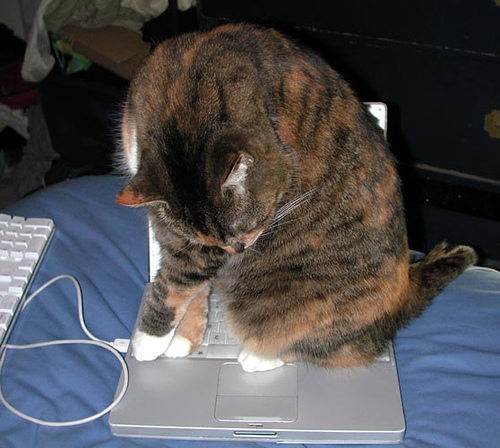

<s> a cat on top of the laptop.</s>


In [75]:
import numpy as np
from torch import nn
from io import BytesIO
import requests

txt = "what does the image describe?"
inputs = ofa_tokenizer([txt], return_tensors="pt").to(device).input_ids

url = 'http://images.cocodataset.org/train2017/000000107664.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
patch_img = load_image(image.convert("RGB"))

captionP = 'The cat is on top of the laptop.'
cap = ofa_tokenizer([captionP], return_tensors="pt").to(device).input_ids


gen_output_0 = ofa_model.generate(inputs, patch_images=patch_img,decoder_input_id = cap, num_beams=1, no_repeat_ngram_size=1,  return_dict_in_generate=True , output_scores=True)
ofa_caption_0 = ofa_tokenizer.batch_decode(gen_output_0[0], skip_special_tokens=False)


display(image)
print(ofa_caption_0[0])


In [76]:
gen_output_0[1]

(tensor([[    -inf, -11.8320,   3.3109,  ..., -11.9919, -12.5210, -11.9670]],
        device='cuda:0'),
 tensor([[    -inf, -10.4893,   1.8931,  ..., -10.2067, -10.8317, -10.7253]],
        device='cuda:0'),
 tensor([[   -inf, -9.5068,  6.9353,  ..., -9.7018, -9.9367, -9.6008]],
        device='cuda:0'),
 tensor([[   -inf, -7.5116,  4.8479,  ..., -7.1199, -7.9731, -7.1625]],
        device='cuda:0'),
 tensor([[   -inf, -6.0454,  9.8112,  ..., -6.3663, -6.8081, -6.2389]],
        device='cuda:0'),
 tensor([[   -inf, -7.6333,  6.4518,  ..., -7.4419, -8.0622, -7.4830]],
        device='cuda:0'),
 tensor([[   -inf, -8.1041,  5.0095,  ..., -7.8550, -8.5473, -8.2914]],
        device='cuda:0'),
 tensor([[    -inf,  -9.8964,  14.3643,  ..., -10.3040, -10.8054,  -9.9076]],
        device='cuda:0'),
 tensor([[    -inf, -11.7167,  17.1540,  ..., -12.3012, -12.5496, -12.3309]],
        device='cuda:0'))

In [70]:
# forward(self, input_ids, patch_images, patch_images_2, patch_masks, token_embeddings, sample_patch_num, decoder_input_ids, code_masks, attention_mask, encoder_outputs, past_key_values, use_cache, output_attentions, output_hidden_states, return_dict)
logits_output = ofa_model.forward(input_ids=inputs,patch_images=patch_img, decoder_input_ids=cap)

In [77]:
logits_output[0]

tensor([[[  1.6335, -11.8320,   3.3109,  ..., -11.9919, -12.5210, -11.9670],
         [-10.8884, -10.9385,   5.8130,  ..., -11.5166, -12.2494, -11.1591],
         [ -9.1585, -11.6716,   5.2756,  ..., -11.3673, -11.6631, -10.9593],
         ...,
         [-11.0238, -10.4376,  13.1890,  ..., -10.7284, -11.0418,  -9.9537],
         [ -3.1317, -12.4979,  14.8605,  ..., -12.6388, -13.1775, -12.4448],
         [ -1.0262,  -6.8667,  13.4910,  ...,  -6.8300,  -7.5461,  -6.7793]]],
       device='cuda:0', grad_fn=<UnsafeViewBackward0>)

In [ ]:
import math
from tabulate import tabulate

tokens = ofa_tokenizer.get_vocab()

partes = logits_output[0].split()
palabras = []
for parte in partes:
    palabras.extend(parte.split("."))


suma_pro = 0
suma_log = 0

datos = []
datos.append(("Token","Probabilidad de la siguiente palabra", "Logit"))

for tensor, p in zip(logits_output[1],palabras):
  probabilities = nn.functional.softmax(tensor, dim=-1)
  max_pro = torch.max(probabilities)
  suma_pro += max_pro

  max_log = torch.max(tensor)
  suma_log += max_log
  datos.append((p,max_pro,max_log))


print(tabulate(datos, headers="firstrow", tablefmt="grid"))

pro =  1 / (1 + math.exp(-suma_log))



print(f"Probabilidad total  : {(suma_pro/len(palabras)).item()} ")
print(f"Suma logits         : {suma_log} ")

In [35]:
import math
from tabulate import tabulate

tokens = ofa_tokenizer.get_vocab()

partes = ofa_caption_0[0].split()
palabras = []
for parte in partes:
    palabras.extend(parte.split("."))


suma_pro = 0
suma_log = 0

datos = []
datos.append(("Token","Probabilidad de la siguiente palabra", "Logit"))

for tensor, p in zip(gen_output_0[1],palabras):
  probabilities = nn.functional.softmax(tensor, dim=-1)
  max_pro = torch.max(probabilities)
  suma_pro += max_pro

  max_log = torch.max(tensor)
  suma_log += max_log
  datos.append((p,max_pro,max_log))


print(tabulate(datos, headers="firstrow", tablefmt="grid"))

pro =  1 / (1 + math.exp(-suma_log))



print(f"Probabilidad total  : {(suma_pro/len(palabras)).item()} ")
print(f"Suma logits         : {suma_log} ")

+---------+----------------------------------------+---------+
| Token   |   Probabilidad de la siguiente palabra |   Logit |
+=========+========================================+=========+
| <s>     |                               0.189251 | 11.8025 |
+---------+----------------------------------------+---------+
| a       |                               0.568238 | 14.388  |
+---------+----------------------------------------+---------+
| cat     |                               0.116445 | 12.4645 |
+---------+----------------------------------------+---------+
| on      |                               0.387782 | 14.7386 |
+---------+----------------------------------------+---------+
| top     |                               0.997874 | 19.8035 |
+---------+----------------------------------------+---------+
| of      |                               0.412099 | 14.6708 |
+---------+----------------------------------------+---------+
| the     |                               0.402401 | 13

In [ ]:
gen_output_0[1]

(tensor([[    -inf, -11.8320,   3.3109,  ..., -11.9919, -12.5210, -11.9670]]),
 tensor([[    -inf, -10.4893,   1.8931,  ..., -10.2067, -10.8317, -10.7253]]),
 tensor([[   -inf, -9.5068,  6.9353,  ..., -9.7018, -9.9367, -9.6008]]),
 tensor([[   -inf, -7.5116,  4.8479,  ..., -7.1199, -7.9731, -7.1625]]),
 tensor([[   -inf, -6.0454,  9.8112,  ..., -6.3663, -6.8081, -6.2389]]),
 tensor([[   -inf, -7.6333,  6.4518,  ..., -7.4419, -8.0622, -7.4829]]),
 tensor([[   -inf, -8.1041,  5.0095,  ..., -7.8550, -8.5473, -8.2914]]),
 tensor([[    -inf,  -9.8964,  14.3643,  ..., -10.3040, -10.8054,  -9.9076]]),
 tensor([[    -inf, -11.7167,  17.1540,  ..., -12.3012, -12.5496, -12.3309]]))

In [ ]:
import math
prob = math.exp(suma_log.item())
prob

2.3118975869344045e+50